<a href="https://colab.research.google.com/github/jesschannn/sqlite_database_operations/blob/main/sqlite_database_operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Packages

In [51]:
import pandas as pd
from sqlalchemy import create_engine
import sqlite3
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Loading in Datasets

In [2]:
chs = pd.read_excel('chs.xlsx')
chs

,Billing/Charge Code,Charge Description,Rev Code,CPT/HCPC,Price,NDC,Package Size,Package Unit,Package Description,Charge Quantity
0,3018437801,"HC 1,5 ANHYDROGLUCITOL,INTERM GLY CNTRL Q10378",301,84378,229.0,NaN,NaN,NaN,NaN,NaN
1,3018263400,HC 11 DEOXYCORTISOL,301,82634,271.0,NaN,NaN,NaN,NaN,NaN
2,3018414300,HC 17 HYDROXPREGNENOLONE,301,84143,177.0,NaN,NaN,NaN,NaN,NaN
3,3018349800,HC 17 HYDROXYPROGESTERONE,301,83498,561.0,NaN,NaN,NaN,NaN,NaN
4,3603621500,HC 1ST ORD SEL CATH ART THORAC,360,36215,908.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
65023,6370000002,XRX ZONISAMIDE 25 MG PO CAPS,250,NaN,316.0,62756-258-02,100.0,each,Bottle,100 each
65024,6370000002,XRX ZONISAMIDE 50 MG PO CAPS,250,NaN,631.0,0378-6726-01,100.0,each,Bottle,100 each
65025,6370000002,XRX ZONISAMIDE 50 MG PO CAPS,250,NaN,631.0,62756-259-02,100.0,each,Bottle,100 each
65026,6370000002,XRX ZONISAMIDE 50 MG PO CAPS,250,NaN,631.0,68001-243-00,100.0,each,Bottle,100 each


In [3]:
mmc = pd.read_csv('MMC_CDM.csv')
mmc

,CDM,CDM_Description,ChargeAmount
0,*RMBD_AdvCardK2,Advanced Cardiac Unit (K2),14070.00
1,*RMBD_CICU,CICU Coronary Care,14070.00
2,*RMBD_ICU,"Intensive Care Units (Includes MICU,SICU,PICU)",14070.00
3,*RMBD_Isolation,Isolation,7830.00
4,*RMBD_Maternity:ICU,Neonatal ICU,13728.00
...,...,...,...
107967,VAC90746,"Hep B vacc, adult , IM(3 DOSE)",112.00
107968,VAC90750,ZOSTER REC VACC(SHINGRIX),340.00
107969,VAC90756,INFLUENZA QUAD IM O.5ML,62.00
107970,VFC90460,"IMMUN ADM <19YR W/COUNSEL,INIT",0.01


# Data Exploration

## Cleaning Up Data + Handling Missing Values

In [4]:
def clean_column_names(chs):
    # Define a helper function to clean column names
    def clean_name(name):
        cleaned_name = re.sub(r'[^a-zA-Z0-9]', '', name)
        return cleaned_name.lower()

    # Rename columns using the helper function
    # This is using a list comprehend - e.g., we have a list to the right of the equals sign,
    # and inside the list, we are applying our function, for every col (or X) that exists in df.columns
    chs.columns = [clean_name(col) for col in chs.columns]
    return chs

# Apply the clean_value function to all columns
chs = clean_column_names(chs)

chs

,billingchargecode,chargedescription,revcode,cpthcpc,price,ndc,packagesize,packageunit,packagedescription,chargequantity
0,3018437801,"HC 1,5 ANHYDROGLUCITOL,INTERM GLY CNTRL Q10378",301,84378,229.0,NaN,NaN,NaN,NaN,NaN
1,3018263400,HC 11 DEOXYCORTISOL,301,82634,271.0,NaN,NaN,NaN,NaN,NaN
2,3018414300,HC 17 HYDROXPREGNENOLONE,301,84143,177.0,NaN,NaN,NaN,NaN,NaN
3,3018349800,HC 17 HYDROXYPROGESTERONE,301,83498,561.0,NaN,NaN,NaN,NaN,NaN
4,3603621500,HC 1ST ORD SEL CATH ART THORAC,360,36215,908.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
65023,6370000002,XRX ZONISAMIDE 25 MG PO CAPS,250,NaN,316.0,62756-258-02,100.0,each,Bottle,100 each
65024,6370000002,XRX ZONISAMIDE 50 MG PO CAPS,250,NaN,631.0,0378-6726-01,100.0,each,Bottle,100 each
65025,6370000002,XRX ZONISAMIDE 50 MG PO CAPS,250,NaN,631.0,62756-259-02,100.0,each,Bottle,100 each
65026,6370000002,XRX ZONISAMIDE 50 MG PO CAPS,250,NaN,631.0,68001-243-00,100.0,each,Bottle,100 each


In [5]:
def clean_column_names(mmc):
    # Define a helper function to clean column names
    def clean_name(name):
        cleaned_name = re.sub(r'[^a-zA-Z0-9]', '', name)
        return cleaned_name.lower()

    # Rename columns using the helper function
    # This is using a list comprehend - e.g., we have a list to the right of the equals sign,
    # and inside the list, we are applying our function, for every col (or X) that exists in df.columns
    mmc.columns = [clean_name(col) for col in mmc.columns]
    return mmc

# Apply the clean_value function to all columns
mmc = clean_column_names(mmc)

mmc

,cdm,cdmdescription,chargeamount
0,*RMBD_AdvCardK2,Advanced Cardiac Unit (K2),14070.00
1,*RMBD_CICU,CICU Coronary Care,14070.00
2,*RMBD_ICU,"Intensive Care Units (Includes MICU,SICU,PICU)",14070.00
3,*RMBD_Isolation,Isolation,7830.00
4,*RMBD_Maternity:ICU,Neonatal ICU,13728.00
...,...,...,...
107967,VAC90746,"Hep B vacc, adult , IM(3 DOSE)",112.00
107968,VAC90750,ZOSTER REC VACC(SHINGRIX),340.00
107969,VAC90756,INFLUENZA QUAD IM O.5ML,62.00
107970,VFC90460,"IMMUN ADM <19YR W/COUNSEL,INIT",0.01


In [6]:
chs.isnull().sum()

billingchargecode         0
chargedescription         0
revcode                   0
cpthcpc               14508
price                    92
ndc                   52316
packagesize           52316
packageunit           52316
packagedescription    52379
chargequantity        52316
dtype: int64

In [7]:
mmc.isnull().sum()

cdm               0
cdmdescription    0
chargeamount      0
dtype: int64

## Basic Statistics for CHS




In [34]:
chs_price_mean = chs['price'].mean()

In [35]:
chs_price_median = chs['price'].median()

In [36]:
chs_price_mode = chs['price'].mode().values[0]

In [43]:
chs_price_range = chs['price'].max() - chs['price'].min()
chs_price_var = chs['price'].var()
chs_price_std= chs['price'].std()
chs_price_iqr = chs['price'].quantile(0.75) - chs['price'].quantile(0.25)

In [46]:
print("Measures of Central Tendency:")
print(f"Mean: {chs_price_mean}")
print(f"Median: {chs_price_median}")
print(f"Mode: {chs_price_mode}")
print("\nMeasures of Spread:")
print(f"Range: {chs_price_range}")
print(f"Variance: {chs_price_var}")
print(f"Standard Deviation: {chs_price_std}")
print(f"IQR (Interquartile Range): {chs_price_iqr}")

Measures of Central Tendency:
Mean: 5967.909789177036
Median: 2077.36
Mode: 3536.25

Measures of Spread:
Range: 574568.75
Variance: 184076781.91647264
Standard Deviation: 13567.489890044977
IQR (Interquartile Range): 5318.75


In [37]:
chs_packagesize_mean = chs['packagesize'].mean()

In [38]:
chs_packagesize_median = chs['packagesize'].median()

In [39]:
chs_packagesize_mode = chs['packagesize'].mode().values[0]

In [45]:
chs_packagesize_range = chs['packagesize'].max() - chs['packagesize'].min()
chs_packagesize_var = chs['packagesize'].var()
chs_packagesize_std= chs['packagesize'].std()
chs_packagesize_iqr = chs['packagesize'].quantile(0.75) - chs['packagesize'].quantile(0.25)

In [47]:
print("Measures of Central Tendency:")
print(f"Mean: {chs_packagesize_mean}")
print(f"Median: {chs_packagesize_median}")
print(f"Mode: {chs_packagesize_mode}")
print("\nMeasures of Spread:")
print(f"Range: {chs_packagesize_range}")
print(f"Variance: {chs_packagesize_var}")
print(f"Standard Deviation: {chs_packagesize_std}")
print(f"IQR (Interquartile Range): {chs_packagesize_iqr}")

Measures of Central Tendency:
Mean: 99.12081238200126
Median: 30.0
Mode: 100.0

Measures of Spread:
Range: 4999.975
Variance: 62995.417540403556
Standard Deviation: 250.98887931620308
IQR (Interquartile Range): 98.0


In [17]:
print (chs['billingchargecode'].value_counts())

2780171301    11024
6370000002     6866
2780177600     4879
2780000057     4868
6360000001     3707
              ...  
6147556300        1
6147555700        1
6147556100        1
6147555900        1
2791725168        1
Name: billingchargecode, Length: 9536, dtype: int64


In [18]:
print (chs['chargedescription'].value_counts())

XRX FUROSEMIDE 10 MG/ML IJ SOLN                      33
XRX FENTANYL CITRATE 50 MCG/ML IJ SOLN (WRAPPER)     33
XRX SODIUM CHLORIDE 0.9 % IV SOLN                    32
XRX ROCURONIUM BROMIDE 10 MG/ML IV SOLN (WRAPPER)    28
XRX DEXTROSE 5 % IV SOLN                             25
                                                     ..
ORMS&D CATH DXTERITY 6F JR 4.0                        1
ORMS&D CATH DXTERITY 6F JR 5.0                        1
ORMS&D CATH DXTERITY 6F KIMNY                         1
ORMS&D CATH DXTERITY 6F LCB                           1
XRX ZOSTER VACCINE LIVE 19400 UNT/0.65ML SC SUSR      1
Name: chargedescription, Length: 54174, dtype: int64


In [19]:
print (chs['revcode'].value_counts())

278    34798
250     8313
279     7751
272     4398
636     4065
       ...  
730        1
329        1
161        1
413        1
943        1
Name: revcode, Length: 131, dtype: int64


In [20]:
print (chs['cpthcpc'].value_counts())

C1713    16782
C1889     8135
C1776     4879
C1725     2294
C1887     1263
         ...  
25248        1
30300        1
40805        1
20520        1
90736        1
Name: cpthcpc, Length: 4379, dtype: int64


In [21]:
print (chs['ndc'].value_counts())

70004-300-55    8
99999-003-46    8
0264-9587-20    8
0264-7800-10    7
70004-100-59    7
               ..
69238-1484-3    1
24338-122-13    1
24338-134-02    1
52536-134-13    1
0006-4963-00    1
Name: ndc, Length: 12088, dtype: int64


In [22]:
print (chs['packageunit'].value_counts())

each                6935
mL                  5157
g                    577
Units                 15
Package                7
halved tablet          7
mg                     3
mcg                    3
capsule                3
quartered tablet       2
oz                     1
kit                    1
vial                   1
Name: packageunit, dtype: int64


In [23]:
print (chs['packagedescription'].value_counts())

Bottle          4811
Vial            2950
Box             1140
Blister          971
Flex Cont        783
Syringe          489
Tube             433
Bag              193
Cup              187
Plas Cont        173
Ampule           146
Glass Cont        79
Package           67
Packet            60
Jar               43
Inhaler           32
Disp Pack         29
Can               18
Cartridge         12
Pen                7
Pump Btl           5
Crtrdg-NDL         5
Sachet             4
Patch              4
Spray Bottle       4
Roll               3
Punchcard          1
Name: packagedescription, dtype: int64


In [24]:
print (chs['chargequantity'].value_counts())

100 each             2570
1 each               1961
30 each               769
10 mL                 606
1 mL                  549
                     ... 
.42 mL                  1
100 mg (1 each)         1
50 mg (0.5 each)        1
25 mg (0.25 each)       1
96 each                 1
Name: chargequantity, Length: 309, dtype: int64


## Basic Statistics for MMC

In [40]:
mmc_chargeamount_mean = mmc['chargeamount'].mean()

In [41]:
mmc_chargeamount_median = mmc['chargeamount'].median()

In [42]:
mmc_chargeamount_mode = mmc['chargeamount'].mode().values[0]

In [48]:
mmc_chargeamount_range = mmc['chargeamount'].max() - mmc['chargeamount'].min()
mmc_chargeamount_var = mmc['chargeamount'].var()
mmc_chargeamount_std = mmc['chargeamount'].std()
mmc_chargeamount_iqr = mmc['chargeamount'].quantile(0.75) - mmc['chargeamount'].quantile(0.25)

In [49]:
print("Measures of Central Tendency:")
print(f"Mean: {mmc_chargeamount_mean}")
print(f"Median: {mmc_chargeamount_median}")
print(f"Mode: {mmc_chargeamount_mode}")
print("\nMeasures of Spread:")
print(f"Range: {mmc_chargeamount_range}")
print(f"Variance: {mmc_chargeamount_var}")
print(f"Standard Deviation: {mmc_chargeamount_std}")
print(f"IQR (Interquartile Range): {mmc_chargeamount_iqr}")

Measures of Central Tendency:
Mean: 2028.6159360760194
Median: 659.0
Mode: 1665.0

Measures of Spread:
Range: 184861.99
Variance: 20524023.615758438
Standard Deviation: 4530.344756832358
IQR (Interquartile Range): 2043.25


In [28]:
print (mmc['cdm'].value_counts())

*RMBD_AdvCardK2    1
G4083585           1
G4084395           1
G4084389           1
G4084054           1
                  ..
AS113406           1
AS113405           1
AS113404           1
AS113403           1
VFC90714           1
Name: cdm, Length: 107972, dtype: int64


In [29]:
print (mmc['cdmdescription'].value_counts())

IMP BREAST NATRELLE INSPIRA       335
NAIL LONG NAIL KIT R1/5 TI R      230
NAIL LONG NAIL KIT R1/5 TI L      230
SCREW HEADLESS COMPRESSION S      174
INSERT TRIATHLON PS X3 TIB 5      172
                                 ... 
REFSTAR C5 MHS HYPER MALE-MALE      1
PM SET                              1
PM PREP SET                         1
DEFIBRILLATOR ELECTRODE PADS        1
Td toxoids preserv free>7yr,IM      1
Name: cdmdescription, Length: 41242, dtype: int64


### Interesting Observation

Something I found intriguing with the mmc dataset in the ```value_counts``` for the ```cdm``` and ```cdmdescription``` is that even though there aren't any recurring CDM data, there are recurring data regarding CDM description. I find it interesting that the descriptions can be applicable to more than one CDM.

## Data Distribution for CHS Dataset

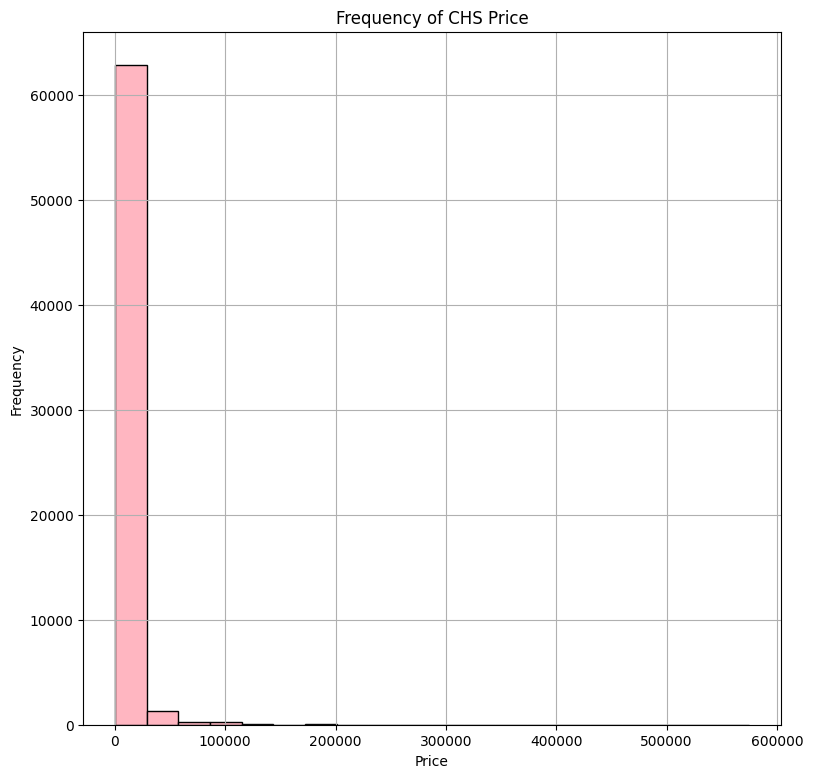

In [56]:
plt.figure(figsize=(9,9))
plt.hist(chs['price'], bins=20, color='lightpink', edgecolor='black')
plt.title('Frequency of CHS Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()